# Birds, dinosaurs, reptiles, and mammals (oh my)

We don't have data on cerebrum size for most organisms, but we can apply machine learning to body mass and brain volume values to classify organisms into birds, dinosaurs, reptiles, and mammals.

## Import libraries and data

Import the libraries you need to build a decision tree and read the bird_dino_gator.csv file into a dataframe. How many rows does the data have?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pydotplus
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
import graphviz
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as tree 
from sklearn import neighbors 
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib as mpl

In [2]:
# READ CSV
df = pd.read_csv("bird_mammal_dino_reptile.csv")

In [3]:
df["Species Type"].loc[df["Species Type"]=="B"]= 0
df["Species Type"].loc[df["Species Type"]=="D"]= 1
df["Species Type"].loc[df["Species Type"]=="R"]= 2
df["Species Type"].loc[df["Species Type"]=="M"]= 3

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Convert the dataframe to a numpy array. (Note, we are not going to calculate a brain to body mass ratio here, we are just going to use these two values as our features for each species.)

In [4]:
#CONVERT TO A NUMPY ARRAY 
df_array = df.to_numpy()

In [28]:
df.head()

,Species Type,Genus,Species,Brain mass (g),Body mass (g)
0,3,Sciurus,aberti,6.850,626.5
1,3,Cynomops,abrasus,0.418,33.3
2,3,Myoprocta,acouchy,9.900,782.0
3,3,Rhinolophus,acuminatus,0.302,12.1
4,3,Lagenorhynchus,acutus,1200.000,120000.0


In [5]:
x = df_array[:,3:5] #Brain mass (g) + #Body mass (g)
#x = df_array[:,4] #Body mass (g)
y = df_array[:,0] #Species Type

In [6]:
print(x)
print(y)

[[6.85 626.5]
 [0.418 33.3]
 [9.9 782.0]
 ...
 [140000.0 69.52]
 [5000000.0 82.88]
 [7000000.0 97.56]]
[3 3 3 ... 1 1 1]


## Training/test data

We are going to split up our dataset into training data, that we will use to train the algorithm, and test data, that we will use to see how well the algorithm performs like we did with the k-nearest neighbors algorithm. From sklearn.model_selection, import train_test_split. Divide the data into 80% training and 20% test data:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

## Create decision tree

Create a decision tree classifier to classify the brains as birds, dinosaurs, or reptiles based on the brain to body mass ratio and cerebrum to whole brain ratio. Make sure to run your decision tree only on the training data (not the test data).

In [8]:
clf = tree.DecisionTreeClassifier()

In [9]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [10]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Testing

We can evaluate our decision tree on our testing data.

In [15]:
ypredtree1binarypred = clf.predict_proba(X_test) #for tree

([[1. 0.]]) means the algorithm is certain it's a |bird|, a result of array([[0. 1.]]) means the algorithm is certain it's a |dinosaur|, a result of ([0. 0. 1. 0.]) means its a |mammal|, and an output of ([[0. 0. 0. 1.]]) means its a |reptile|.

In [18]:
ypredtree1metrics = clf.predict(X_test) #for metrics (in KNN)
#print(ypredtree1metrics)
#print(y_test)
#print(ypredtree1binarypred)

In [19]:
print("Computer's Decision: ", ypredtree1metrics)
print("(Binary) Decision    ", ypredtree1binarypred)
print("Actual Answers:      ", y_test)

Computer's Decision:  [0 3 0 ... 0 0 0]
(Binary) Decision     [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
Actual Answers:       [0 3 0 ... 0 3 0]


Calculate the accuracy of the decision tree by importing |metrics| from |sklearn| and then finding the |accuracy score|.

In [20]:
print("Accuracy:", metrics.accuracy_score(y_test, ypredtree1metrics))

Accuracy: 0.8190114068441064


# Your Ugly Tree

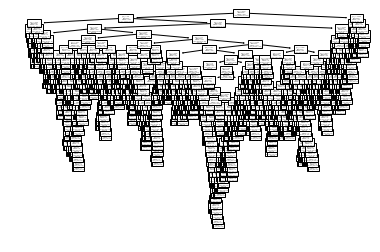

In [25]:
tree.plot_tree(clf, class_names= "Bird" "Dinosaur" "Mammal" "Reptile")
plt.show()

## Beautification

If time permits, play around with changing the appearance of your decision tree and plotting a decision surface!

In [43]:
#tree.plot_tree(d_b_tree, class_names= "Bird" "Dino")
#plt.show()

# Visualize data
data_feature_names = ["Brain mass (g)", "Body mass (g)"]
dot_data = tree.export_graphviz(clf,feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
data_class_names = [ 'Bird', 'Dinosaur', 'Mammal', 'Reptile']
colors = ('cyan', 'white', 'pink', "green", "grey")
#["true color", "false color"]
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

nodes = graph.get_node_list()
for node in nodes:
    if node.get_name() not in ('node', 'edge'):
        values = clf.tree_.value[int(node.get_name())][0]
        #color only nodes where only one class is present
        if max(values) == sum(values):    
            node.set_fillcolor(colors[np.argmax(values)])
        #mixed nodes get the default color
        else:
            node.set_fillcolor(colors[-1])

graph.write_png('birds_dinos_reptiles_mammals_tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.819359 to fit



True